🎯 Desafio dia 88 — Avaliação de Cursos Online

📂 Dataset: desafio_dia_88_cursos_online.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Uma empresa de educação online quer entender melhor o engajamento dos usuários e as avaliações dos cursos em diferentes plataformas e categorias.

🛠️ Tarefas do desafio

🧹 Tratamento de dados
- Preencha os valores ausentes em horas_concluidas com a média.

- Preencha os valores ausentes em avaliacao_usuario com a moda.

📊 Análise geral
- Qual plataforma tem a maior média de horas concluídas por curso?

- Qual categoria tem a melhor média de avaliação dos usuários?

📈 Visualização de dados
- Crie um gráfico de barras comparando a média de avaliação por categoria.

🤖 Machine Learning - Regressão
- Crie um modelo para prever a avaliacao_usuario com base em:

categoria, plataforma, horas_concluidas

Use:

train_test_split

get_dummies

RandomForestRegressor

Avalie com mean_squared_error.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("desafio_dia_88_cursos_online.csv")
df.head()

,id_curso,categoria,plataforma,horas_concluidas,avaliacao_usuario
0,1000,Tecnologia,Outros,20.6,4.0
1,1001,Tecnologia,Udemy,12.4,2.0
2,1002,Negócios,edX,5.3,3.0
3,1003,Design,edX,22.4,3.0
4,1004,Idiomas,Coursera,16.0,4.0


In [3]:
#Preencha os valores ausentes em horas_concluidas com a média.
df["horas_concluidas"] = df["horas_concluidas"].fillna(df["horas_concluidas"].mean())
df["horas_concluidas"].isna().sum()

0

In [4]:
#Preencha os valores ausentes em avaliacao_usuario com a moda.
df["avaliacao_usuario"] = df["avaliacao_usuario"].fillna(df["avaliacao_usuario"].mode()[0])
df["avaliacao_usuario"].isna().sum()

0

In [5]:
#Qual plataforma tem a maior média de horas concluídas por curso?
plataforma_mais_horas = df.groupby("plataforma")["horas_concluidas"].mean().sort_values(ascending=False)
print(plataforma_mais_horas)

plataforma
Udemy       16.298555
Outros      16.291141
edX         15.247152
Coursera    15.107197
Alura       14.744946
Name: horas_concluidas, dtype: float64


In [6]:
#Qual categoria tem a melhor média de avaliação dos usuários?
categoria_melhor_avaliacao = df.groupby("categoria")["avaliacao_usuario"].mean().sort_values(ascending=False)
print(categoria_melhor_avaliacao)

categoria
Tecnologia    3.702479
Design        3.682353
Saúde         3.660000
Idiomas       3.562500
Negócios      3.551020
Name: avaliacao_usuario, dtype: float64


C:\Users\gabri\AppData\Local\Temp\ipykernel_2684\3053491039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x="categoria", y="avaliacao_usuario", palette="viridis")


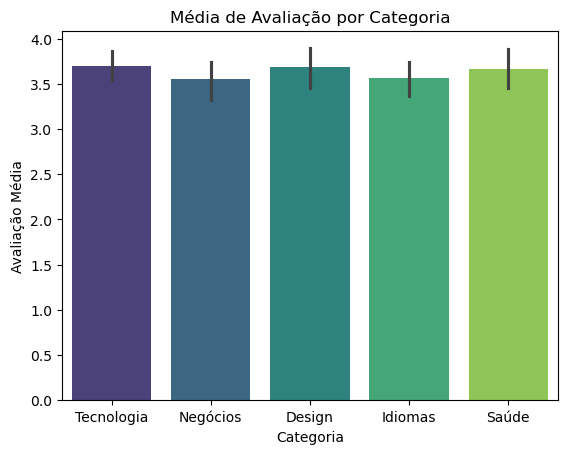

In [13]:
#Crie um gráfico de barras comparando a média de avaliação por categoria.

sns.barplot(df, x="categoria", y="avaliacao_usuario", palette="viridis")
plt.title("Média de Avaliação por Categoria")
plt.ylabel("Avaliação Média")
plt.xlabel("Categoria")
plt.show()

In [16]:
#Crie um modelo para prever a avaliacao_usuario com base em:
X = df[["categoria", "plataforma", "horas_concluidas"]]
y = df["avaliacao_usuario"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

1.3281824814596455
